# TODO

prepare data for: 

ad_viz_plotval_data_ozone_Bronx.csv 

all_states_data_sorted.csv

station number for NY: 725030

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# import my own module
from utility import *


In [2]:
df_oz = pd.read_csv('ad_viz_plotval_data_ozone_Bronx.csv')

In [3]:
df_oz.head(2)
df_oz = df_oz[ ['Date', 'Daily Max 8-hour Ozone Concentration', 'DAILY_AQI_VALUE'] ]
# convert Date to pandas datetime object
df_oz.Date = pd.to_datetime(df_oz.Date)
# set Date as index column
df_oz = df_oz.set_index('Date')

In [4]:
df_oz.head(1)

,Daily Max 8-hour Ozone Concentration,DAILY_AQI_VALUE
Date,,
2012-08-14,0.04,37


In [5]:
df_oz.tail(1)

,Daily Max 8-hour Ozone Concentration,DAILY_AQI_VALUE
Date,,
2020-05-25,0.029,27


In [7]:
missing_dates = pd.date_range(df_oz.index.min(), df_oz.index.max()).difference(df_oz.index)
print ('Dataset date range:', df_oz.index.min().strftime('%Y-%m-%d'), ' to ' ,df_oz.index.max().strftime('%Y-%m-%d') )    
print ('Number of missing dates in the dataset : %d / %d ' % ( len(missing_dates), df_oz.shape[0] ) )

Dataset date range: 2012-08-14  to  2020-05-25
Number of missing dates in the dataset : 97 / 2745 


In [8]:
# work on the missing dates
df_oz = df_oz.reindex(  pd.date_range(df_oz.index.min(), df_oz.index.max())  ) 
# fill those missing dates with the last known date
df_oz.ffill(axis=0, inplace=True)
# Now move the Date index as one of the columns, easier for later analysis
df_oz = df_oz.rename_axis('Date').reset_index()
print ( 'After filling the missing dates: the # of missing dates:', df_oz.isnull().any().sum() )

After filling the missing dates: the # of missing dates: 0


In [9]:
# Check for duplicate data
print ( df_oz.duplicated(subset='Date', keep='first').sum() )

0


In [10]:
# Although there are 0 duplicate data let's remove the duplicate anyway
df_oz = df_oz.drop_duplicates(subset='Date', keep='first')

In [11]:
df_oz.head(2)

,Date,Daily Max 8-hour Ozone Concentration,DAILY_AQI_VALUE
0,2012-08-14,0.040,37.0
1,2012-08-15,0.045,42.0


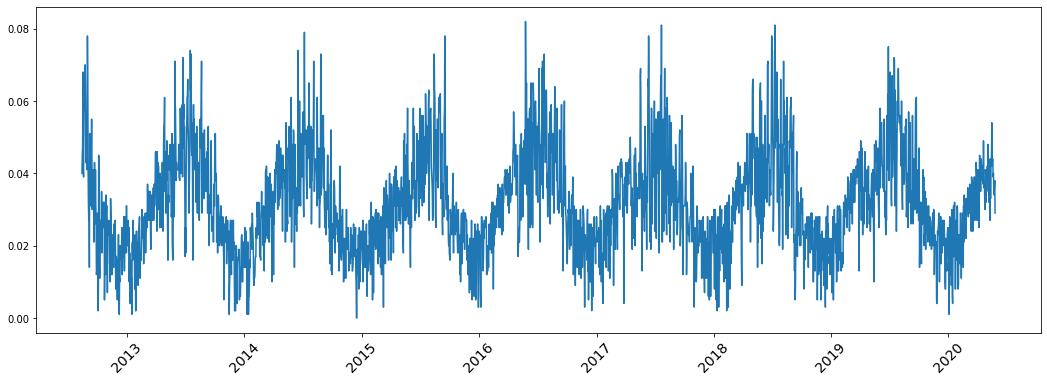

In [13]:
plt.figure(figsize=(18,6))
plt.plot(df_oz.Date, df_oz['Daily Max 8-hour Ozone Concentration'])
plt.xticks(fontsize=14, rotation=45);

In [14]:
df_oz.to_csv('bronx_preprocessed.csv',index=False)

# Temperature Data

In [23]:
df = pd.read_csv('all_states_data_sorted.csv')

In [20]:
df.head(2)

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,722950,23174,1944,1,1,59.0,6,42.7,6,1022.8,...,*,0.00,I,999.9,0,0,0,0,0,0
1,722950,23174,1944,1,2,51.7,24,48.6,24,1022.3,...,*,99.99,NaN,999.9,1,1,0,0,0,0


In [24]:
df['Date'] = pd.to_datetime(df[['year', 'mo', 'da']].astype(str).agg('-'.join, axis=1))
df.head(2)

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,...,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,Date
0,722950,23174,1944,1,1,59.0,6,42.7,6,1022.8,...,0.00,I,999.9,0,0,0,0,0,0,1944-01-01
1,722950,23174,1944,1,2,51.7,24,48.6,24,1022.3,...,99.99,NaN,999.9,1,1,0,0,0,0,1944-01-02


In [25]:
df = df.set_index('Date')
df = df.drop(['year', 'mo', 'da'], axis=1).sort_index()  #drop the individual Y, M, D columns and sort as dates
df.head(2)

,stn,wban,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
Date,,,,,,,,,,,,,,,,,,,,,
1944-01-01,722950,23174,59.0,6,42.7,6,1022.8,6,9999.9,0,...,*,0.00,I,999.9,0,0,0,0,0,0
1944-01-02,722950,23174,51.7,24,48.6,24,1022.3,24,9999.9,0,...,*,99.99,NaN,999.9,1,1,0,0,0,0


In [26]:
#Check for missing dates
missing_dates = pd.date_range(df.index.min(), df.index.max()).difference(df.index)
print ('Dataset date range:', df.index.min().strftime('%Y-%m-%d'), ' to ' ,df.index.max().strftime('%Y-%m-%d') )    
print ('Number of missing dates in the dataset : %d / %d ' % ( len(missing_dates), df.shape[0] ) )

Dataset date range: 1944-01-01  to  2020-05-18
Number of missing dates in the dataset : 10308 / 60473 


In the entire date range there is a huge number of missing dates.
let's check only last 20 years.

In [38]:
md2 = pd.date_range(datetime(1973, 1, 1), df.index.max()).difference(df.index)
print (md2, len(md2))

DatetimeIndex([], dtype='datetime64[ns]', freq=None) 0


There are no missing dates since 1973 (last 47 years)

In [42]:
df2 = df[df.index>=datetime(1973, 1, 1)]
df2.head(2)

,stn,wban,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
Date,,,,,,,,,,,,,,,,,,,,,
1973-01-01,725020,14734,58.9,24,46.7,24,1015.8,24,1014.5,20,...,*,0.0,D,999.9,0,1,0,0,0,0
1973-01-01,722950,23174,58.6,24,12.9,24,1018.7,24,1015.1,24,...,*,0.0,A,999.9,0,0,0,0,0,0


In [43]:
missing_dates = pd.date_range(df2.index.min(), df2.index.max()).difference(df2.index)
print ('Dataset date range:', df2.index.min().strftime('%Y-%m-%d'), ' to ' ,df2.index.max().strftime('%Y-%m-%d') )    
print ('Number of missing dates in the dataset : %d / %d ' % ( len(missing_dates), df2.shape[0] ) )

Dataset date range: 1973-01-01  to  2020-05-18
Number of missing dates in the dataset : 0 / 60188 


In [65]:
# check for the duplicates
print ('Are there any duplicates?', df2.index.duplicated().any() )

Are there any duplicates? True


In [66]:
df2.index.duplicated()

array([False,  True,  True, ..., False,  True,  True])

In [68]:
df3 = df2.index.drop_duplicates()

In [69]:
df3.index.duplicated()

AttributeError: 'DatetimeIndex' object has no attribute 'index'

In [ ]:
dfn = dfn_.reset_index().drop_duplicates(subset='Date', keep='first').set_index('Date')


In [54]:
mnths = ['Jan', 'Feb', 'Mar', 'Feb', 'Mar', 'Aug']

idx = ['a','b','c', 'd', 'c', 'a', 'c']
x1 = np.arange(1, len(idx)+1)
x2 = 10+np.arange(1, len(idx)+1)

dff = pd.DataFrame({'indx':idx, 'x1':x1, 'x2':x2})
dff

,indx,x1,x2
0,a,1,11
1,b,2,12
2,c,3,13
3,d,4,14
4,c,5,15
5,a,6,16
6,c,7,17


In [59]:
#dff.duplicated(subset='indx')
dff=dff.set_index('indx')

In [60]:
dff.index.duplicated()

array([False, False, False, False,  True,  True,  True])